In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def SHOW(img):
    display(Image.fromarray(img[:,:,::-1]));

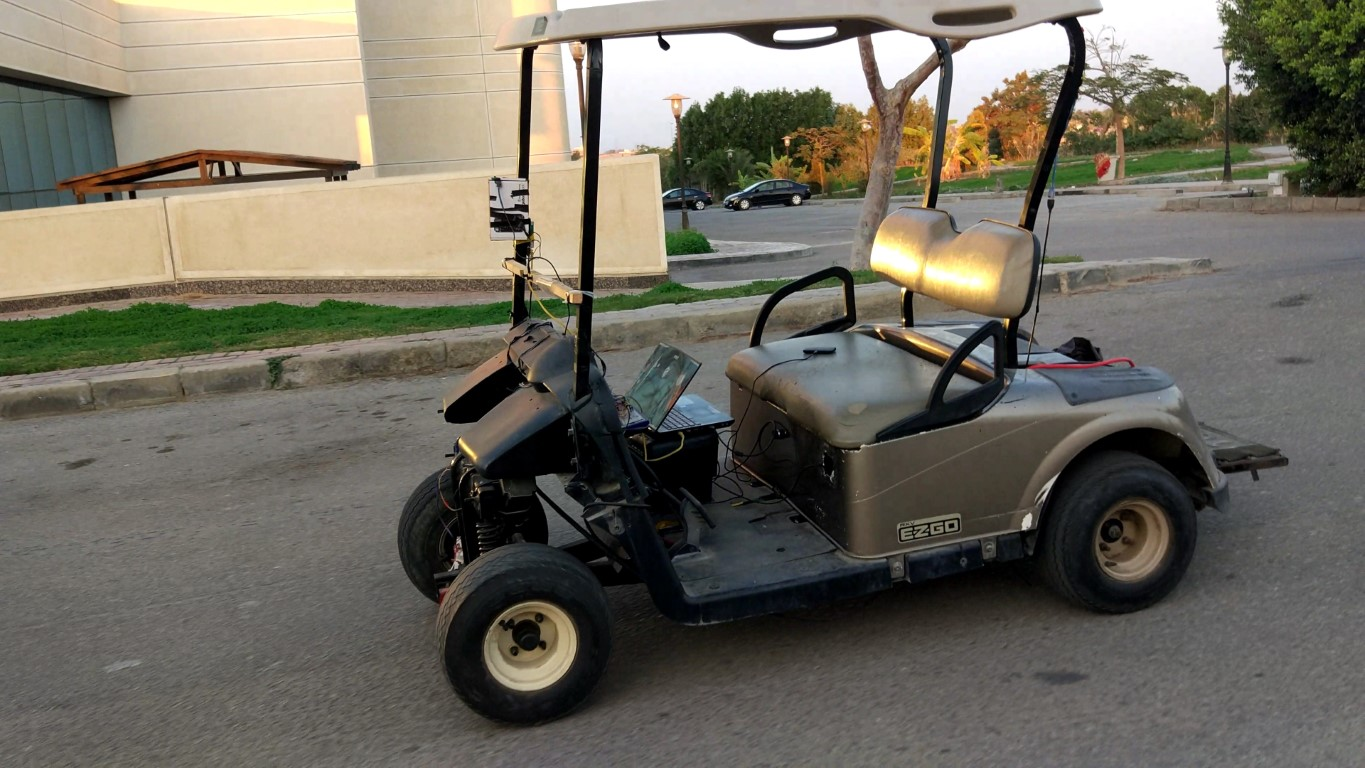

In [3]:
img = cv2.imread('carkyo.jpg')
SHOW(img)

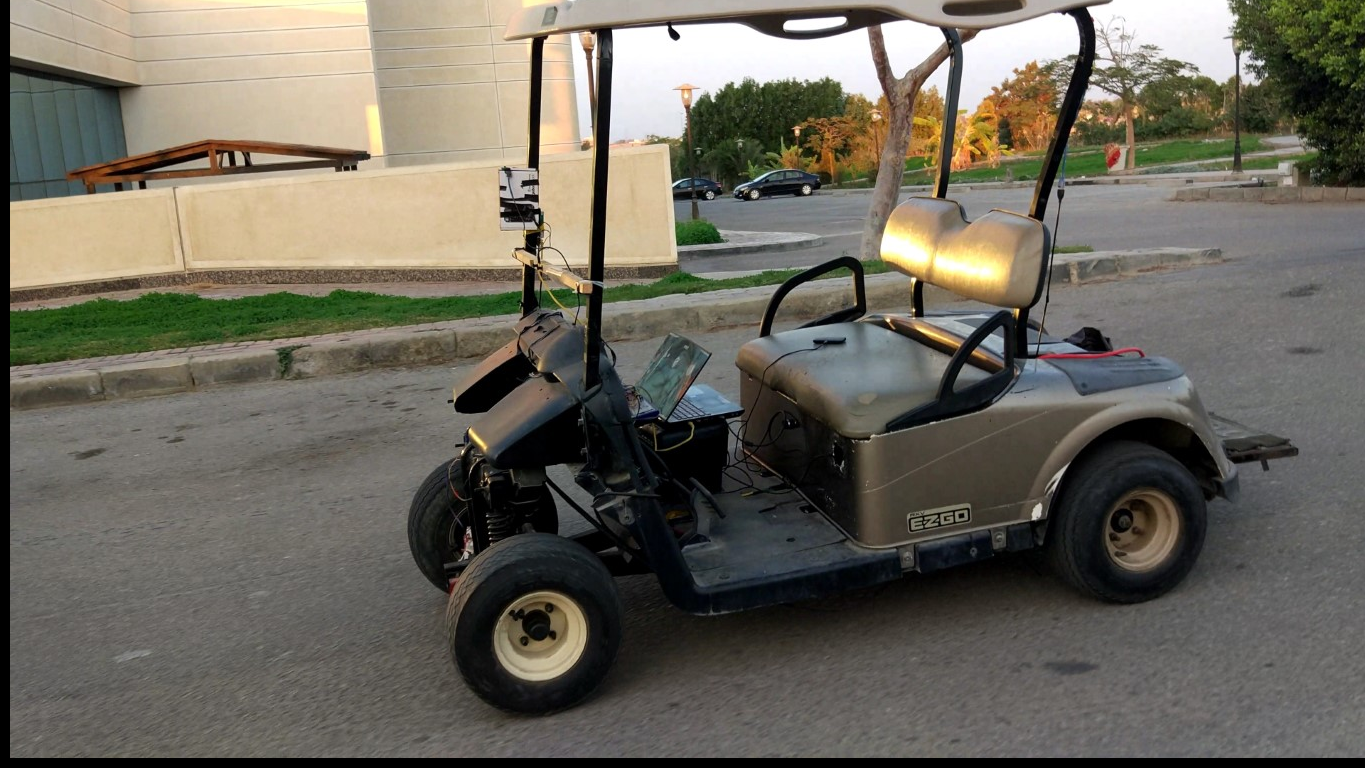

'\nwhy cant transform img from up and down or left and right at same time?\nIs there anthor way instead of wrapAffine ?\nn = np.float32(\n    [\n        [1, 0, -10],\n        [0, 1,  10]\n        ]\n    )\ndst2 = cv2.warpAffine(dst,n,(cols,rows))\nSHOW(dst2)\n'

In [4]:
rows,cols = img.shape[:2]
M = np.float32(
    [
        [1, 0, 10],
        [0, 1,  -10]
        ]
    )
dst = cv2.warpAffine(img,M,(cols,rows))

SHOW(dst)
'''
why cant transform img from up and down or left and right at same time?
Is there anthor way instead of wrapAffine ?
n = np.float32(
    [
        [1, 0, -10],
        [0, 1,  10]
        ]
    )
dst2 = cv2.warpAffine(dst,n,(cols,rows))
SHOW(dst2)
'''


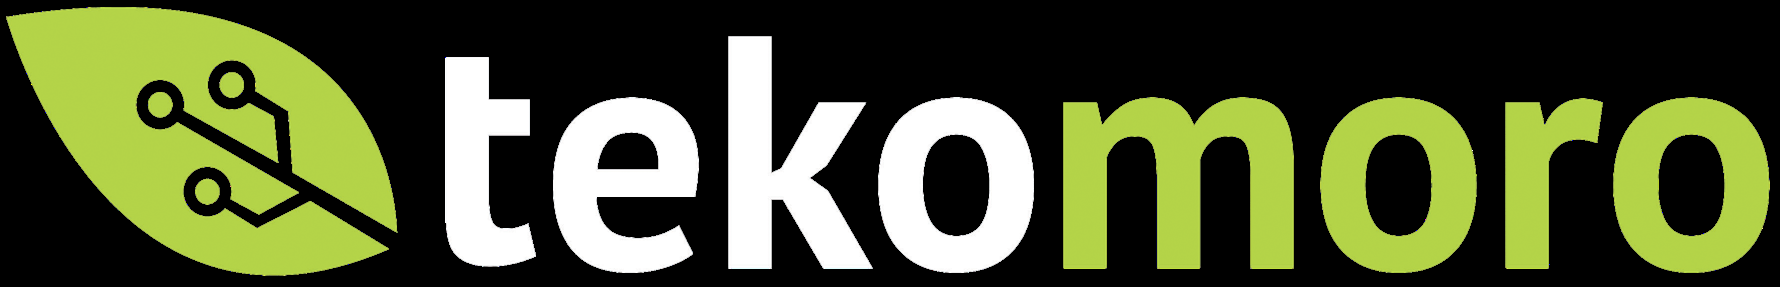

(287, 1780, 3)

In [5]:
logo=cv2.imread('tekomoro.png')
SHOW(logo)
logo.shape

In [6]:
"""
1780  ---> 150 the factor is 11.8  same ratio for width and hight(Ratio reversed)
287   --->  ?

187 / 11.8  = 24  

so ---> logo size (150 w ,24 h)
"""
logo_resize=cv2.resize(logo,(150,24))
rows,cols,chs=logo_resize.shape
img_row,img_cols,img_chs=dst.shape
roi=img[img_row-rows:,img_cols-cols:]
SHOW(roi)


In [7]:
SHOW(logo_resize)

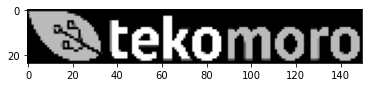

In [8]:
gray=cv2.cvtColor(logo_resize,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

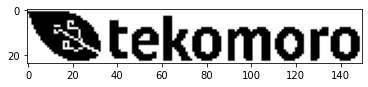

In [9]:
ret,mask=cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV)
plt.imshow(mask, cmap='gray');

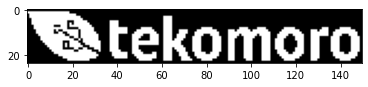

In [10]:
mask_inv=cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray');

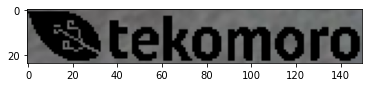

In [11]:
fg=cv2.bitwise_and(roi,roi,mask=mask)
plt.imshow(fg, cmap='gray');

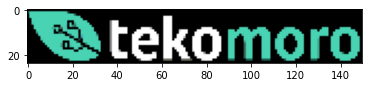

In [12]:
bg=cv2.bitwise_and(logo_resize,logo_resize,mask=mask_inv)
plt.imshow(bg, cmap='gray');

(24, 150, 3)

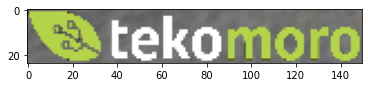

In [17]:
out=cv2.add(bg,fg)
plt.imshow(out[:,:,::-1]);
out.shape

1365 768
24 150
Successfully saved


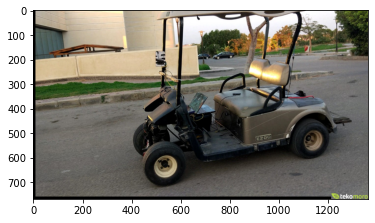

In [14]:
copy=dst.copy()
copy.shape
print(img_cols,img_row)
print(rows,cols)
copy[img_row-rows:,img_cols-cols:]=out
plt.imshow(copy[:,:,::-1]);
cv2.imwrite("out.jpg",copy)
print('Successfully saved')

1365 768
24 150
Successfully saved


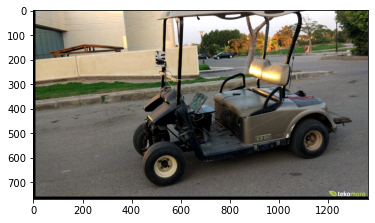

In [18]:
copy=dst.copy()
copy.shape
print(img_cols,img_row)
print(rows,cols)
out.shape
copy[734:758,1205:1355]=out
plt.imshow(copy[:,:,::-1]);
cv2.imwrite("out2.jpg",copy)
print('Successfully saved')